# Boom Bikes : Bike Sharing - An ML Study
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [55]:
# Required Libraries

import warnings 
warnings.filterwarnings('ignore')

In [56]:
import numpy as np
import pandas as pd

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Import the  helper libraries

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [64]:
#import the model libraries
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

### 1. Data EDA

In [65]:
# Read the input data.
df = pd.read_csv('./day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
df.shape

(730, 16)

In [67]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observations from looking at the data

* There are 730 records & 15 columns
* All columns have non-null values.  So there is no need to impute any values.


#### Rename Variables

To better understand the variables, they should have sensible names.  Some of the variables like yr, mnth, hum, cnt need to be renamed to more clear names.

In [69]:

df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Categorizing Categorical vs Continuous Variables

In [70]:
df.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

> Looking at the number of values above - year, holiday, workingday, weathersit, season, weekday & month are categorical variables and the rest can be categorized as continuous variables


#### Mapping Variable

In [71]:
# Map categorical variables to human readable values for better readability

# Map the 4 seasons
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

# Map the months & weekdays to their names.
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

# Clear definition of the weather conditions
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Visualizing the data

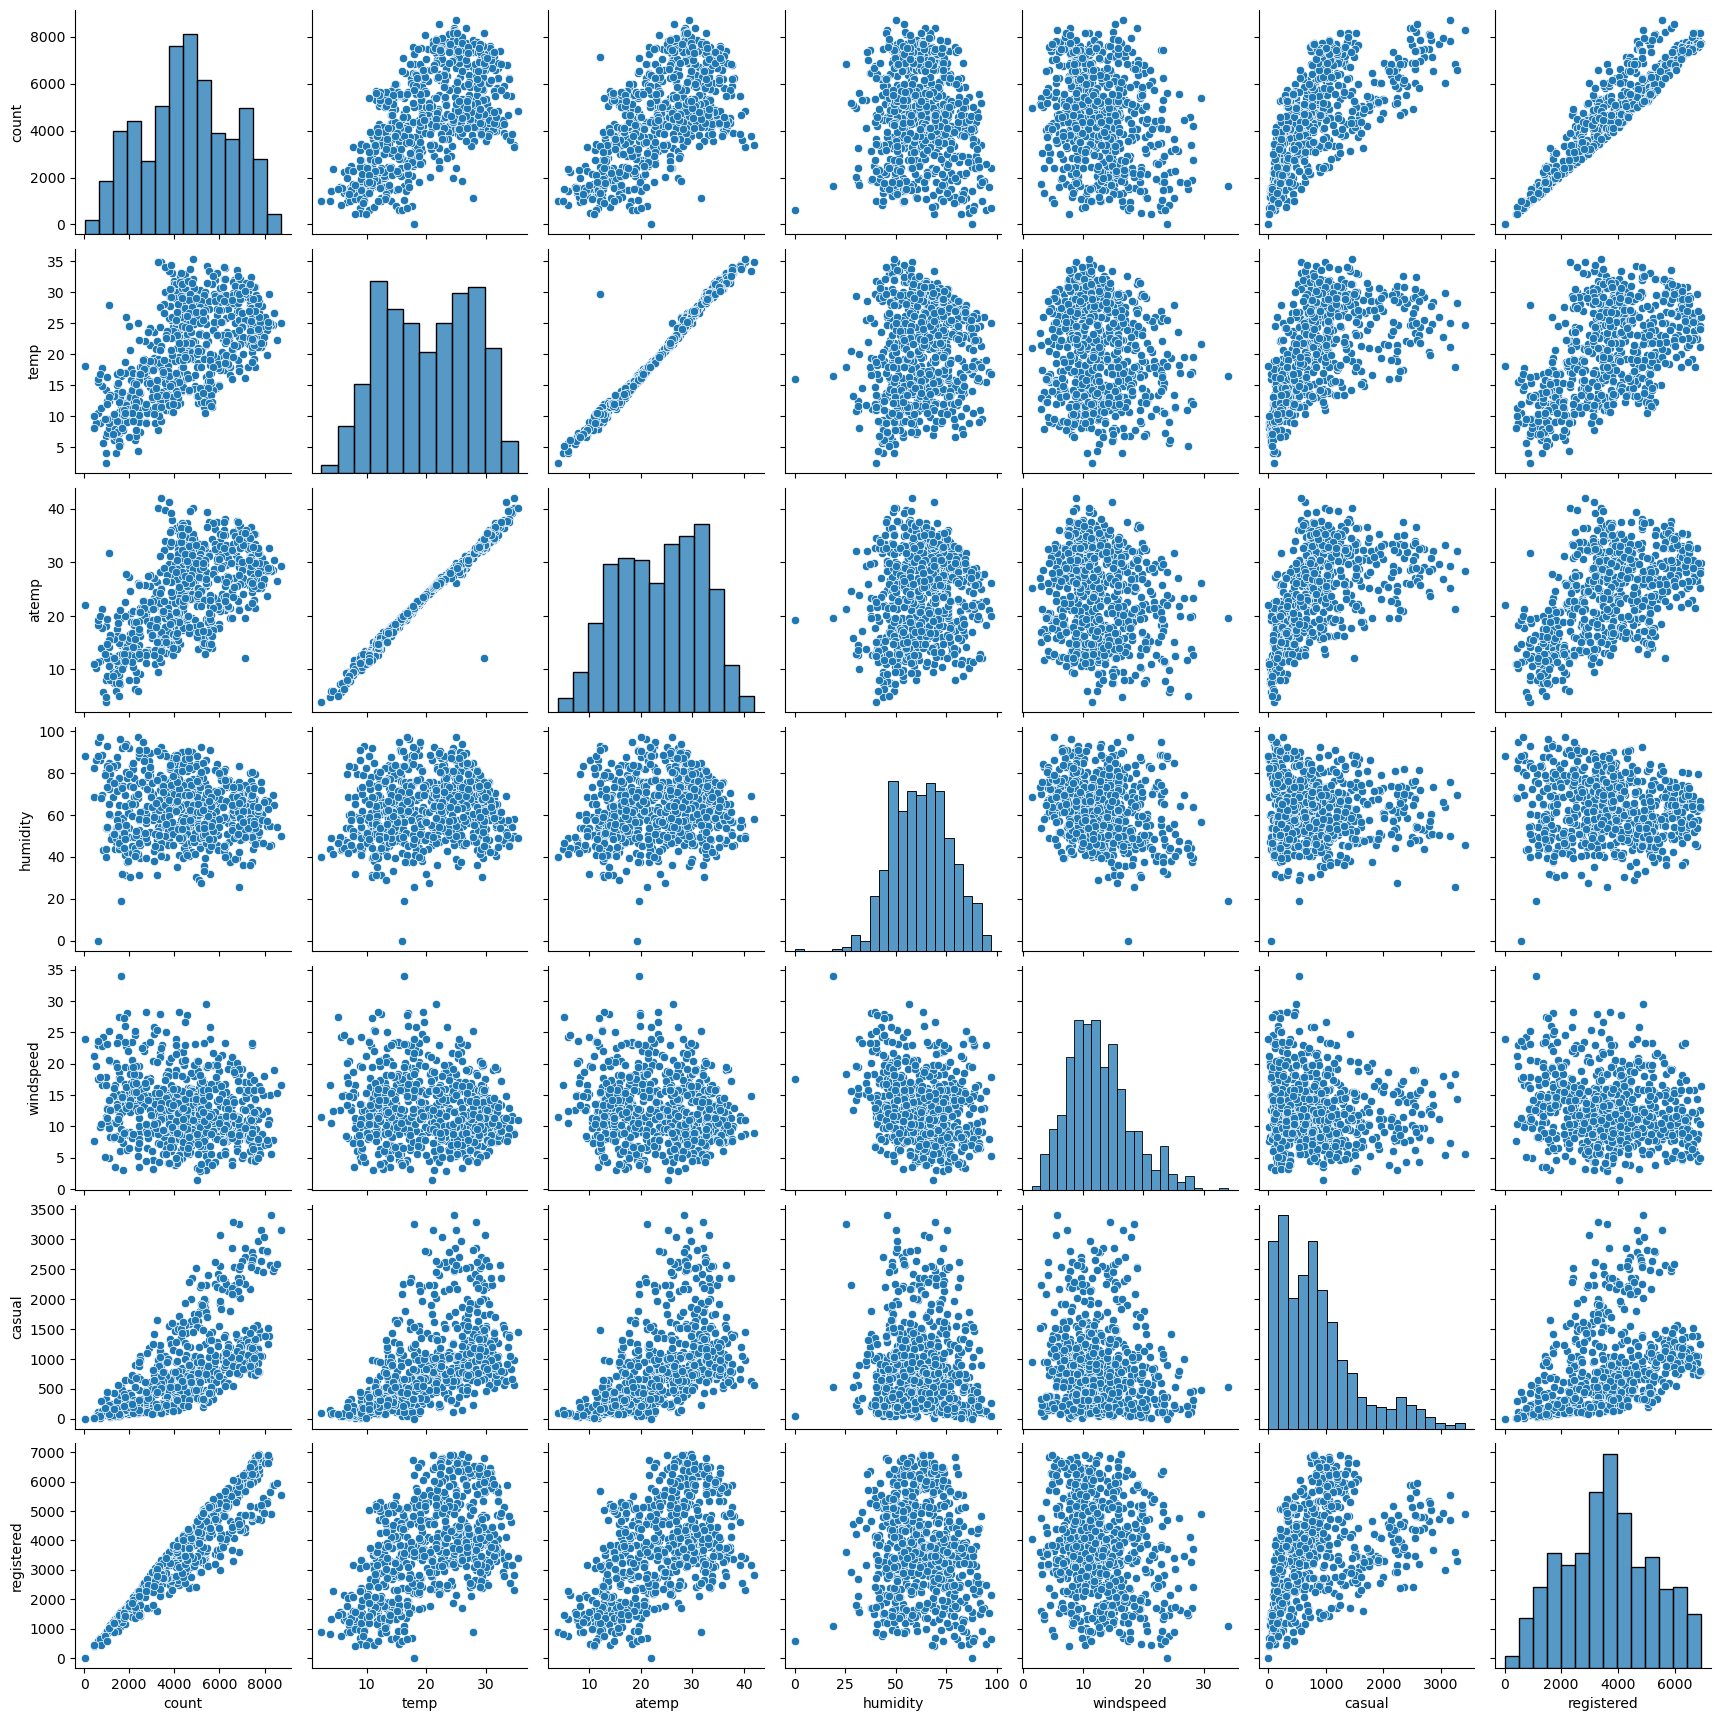

In [72]:
# Can we find any trends by plotting the numerical variables with the count?
numerical_vars=["count","temp","atemp","humidity","windspeed","casual","registered"]

# Create a pairplot with the numerical variables
sns.pairplot(df[numerical_vars])
plt.show()

##### Observations


Looking at the data, there are a few variables that are co-related to the count values.  
Correlation between ***count*** and these variables seems to be strong


* Temperature
* Wind speed
* Humidity


Temperature seems to be a variable to investigate more

#### Box Plots

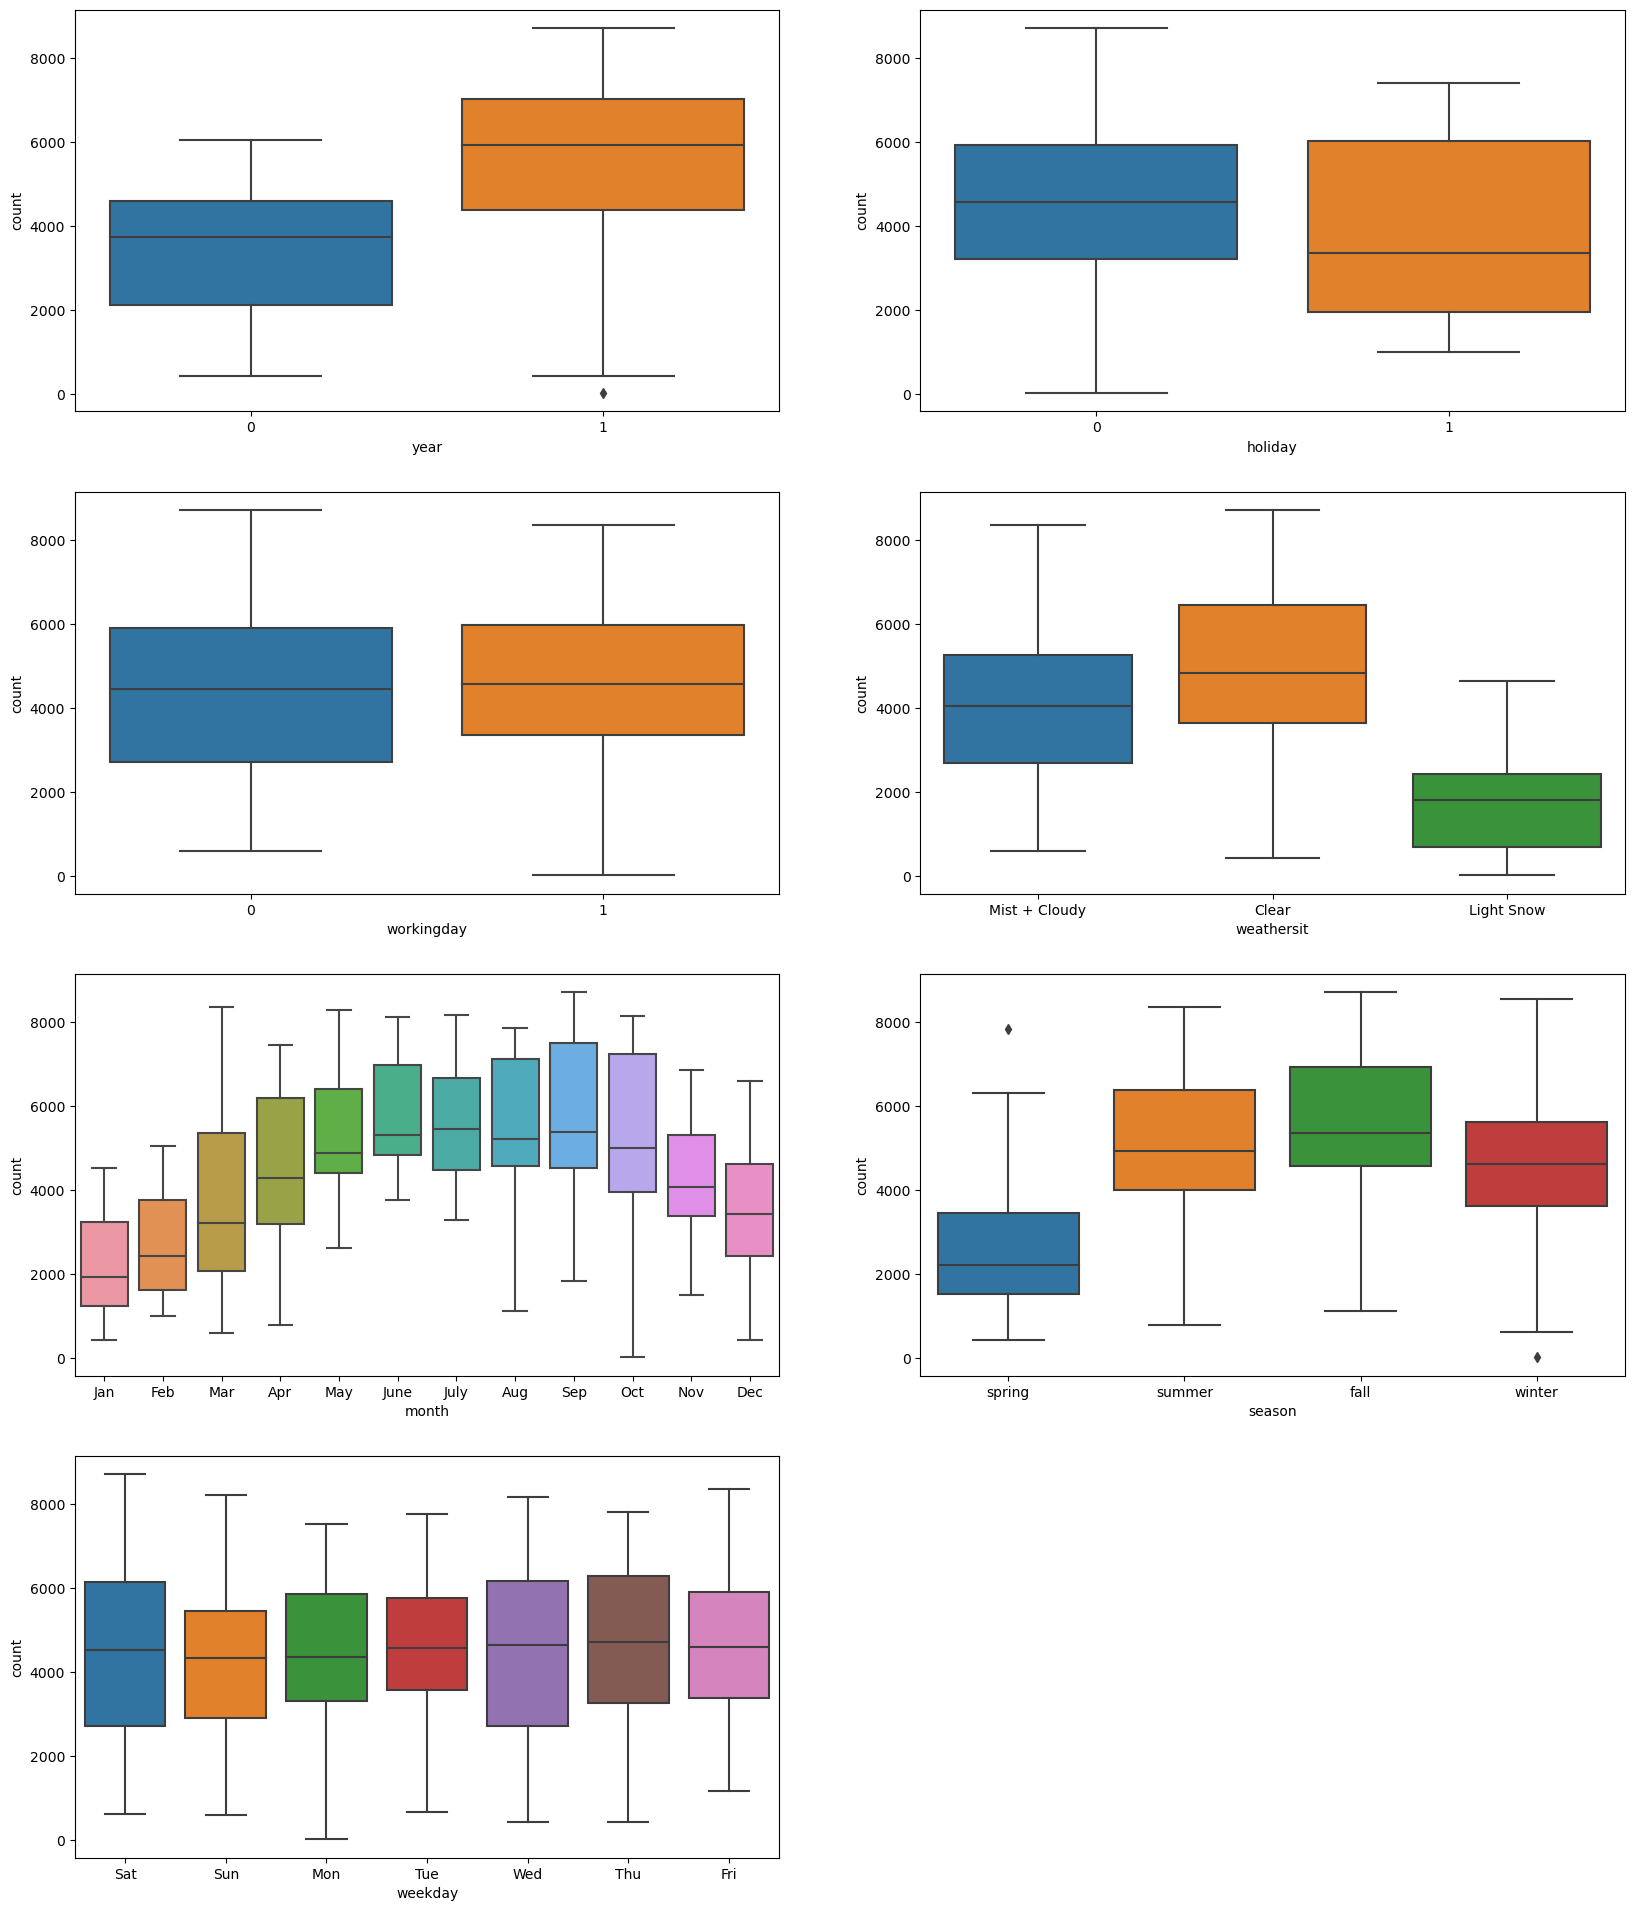

In [73]:
# Box plots for categorical variables

plt.figure(figsize=(20, 24))
plt.subplot(4,2,1)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.subplot(4,2,2)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(4,2,3)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'count', data = df)
plt.subplot(4,2,5)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(4,2,6)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.show()

##### Observations

* There isn't any specific trend between weekdays and weekends
* The clearer the weather, the more bikes are rented
* Business in 2019 is clearly more than 2018.  There is growth in business YoY

#### Univariate Analysis

##### (a) Temperature

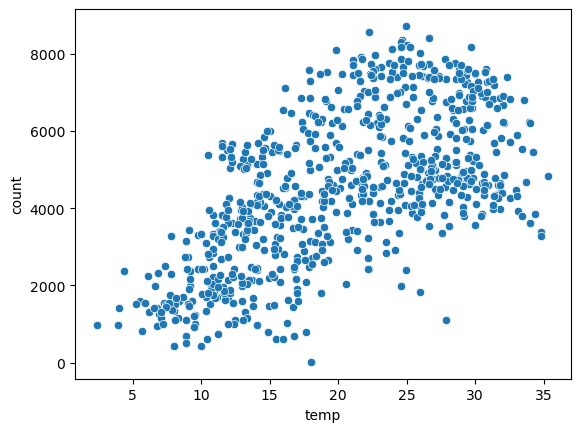

In [74]:
# A closer look at the temperature vs count 
sns.scatterplot(x='temp',y='count' ,data=df)
plt.show()

There is a strong correlation between the temperature and count of bike rentals.  
As the temperature increases, the count of bike rentals goes up.

##### (b) Weather Situation


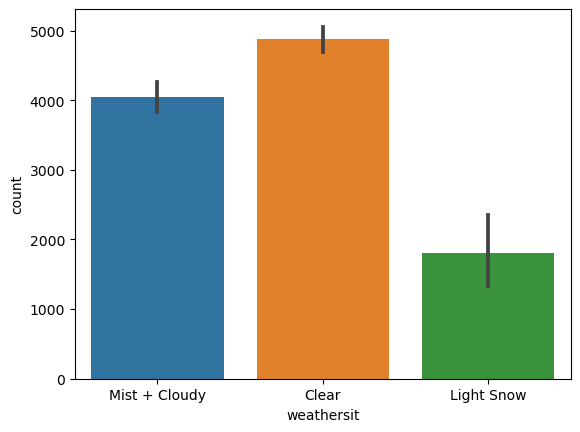

In [75]:
# How does the weather situation affect the bike rentals?
sns.barplot(x = 'weathersit',y = 'count',palette="tab10",data=df)
plt.show()

Clear weather seems to increase the number of rentals.  
That seems obvious considering that during cloudy/rainy or snowy weather, bikes riding is difficult.

##### (c) Season

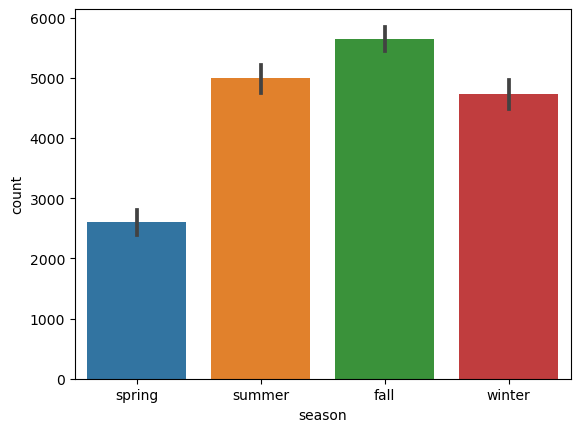

In [76]:
# How does the season affect the bike rentals?
sns.barplot(x = 'season',y = 'count',palette="tab10",data=df)
plt.show()

**Which seasons show most rentals?**
    
Fall seems to be the season when most bike rentals happen, followed by summer    
    

#### Correlation Matrix & Analysis

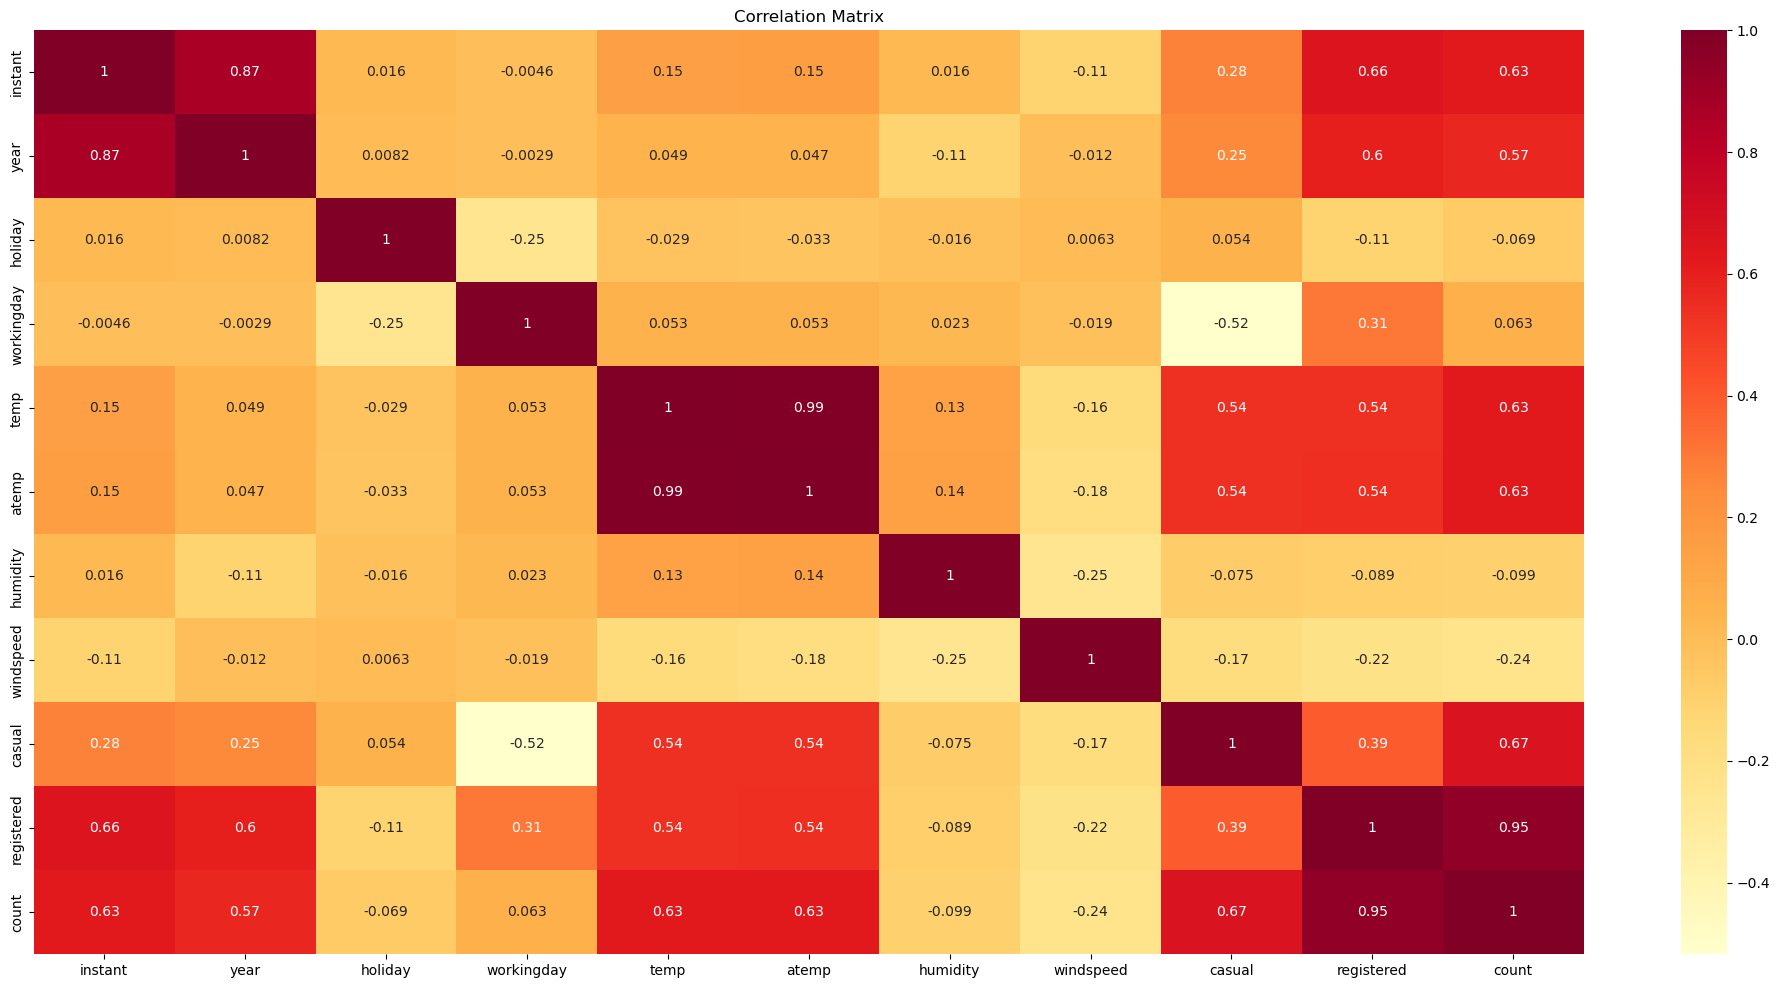

In [77]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), cmap='YlOrRd', annot = True)
plt.title("Correlation Matrix")
plt.show()

##### What does the data say?
  
   
As can be seen from the corrleation matrix, there are a few variables that correlate well.  
Temperature clearly stands out

### 2. Data Preparation

   
     
We have seen the data and through the EDA we understood that some of the variables are not required.

* instant - an ID field
* atemp - just a variation of the temp field (this one shows how the temperature feels like)
* dteday
* casual, registered - break up of the count fields into casual rides or registered rides.

   
We are going to drop these

In [78]:
df.drop(['instant','dteday','casual', 'registered','atemp'], inplace=True, axis=1)

In [79]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [80]:
df.describe()

,year,holiday,workingday,temp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [81]:
df.shape

(730, 11)

##### Create dummy variables

In [82]:
# Creating dummy variables for month, weathersit, weekday & season

month = pd.get_dummies(df.month, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)

In [83]:
# Add these columns to the dataframe
df = pd.concat([df,month, weekday, weathersit, season], axis=1)

In [84]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [85]:
# Now that the dummy variables are created, drop the original columns

df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [86]:
df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Test Train Split

In [87]:
# Split the data in to test & train sets

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [88]:
df_train.shape

(510, 29)

In [89]:
df_test.shape

(220, 29)

#### Scaling the values

In [90]:
# We are using the MinMaxScaler to normalize the values of variables - temp, humidity, windspeed & count.

In [91]:
norm_scaler = MinMaxScaler()
scaler_var = ['humidity', 'windspeed', 'temp', 'count']
df_train[scaler_var] = norm_scaler.fit_transform(df_train[scaler_var])

In [92]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


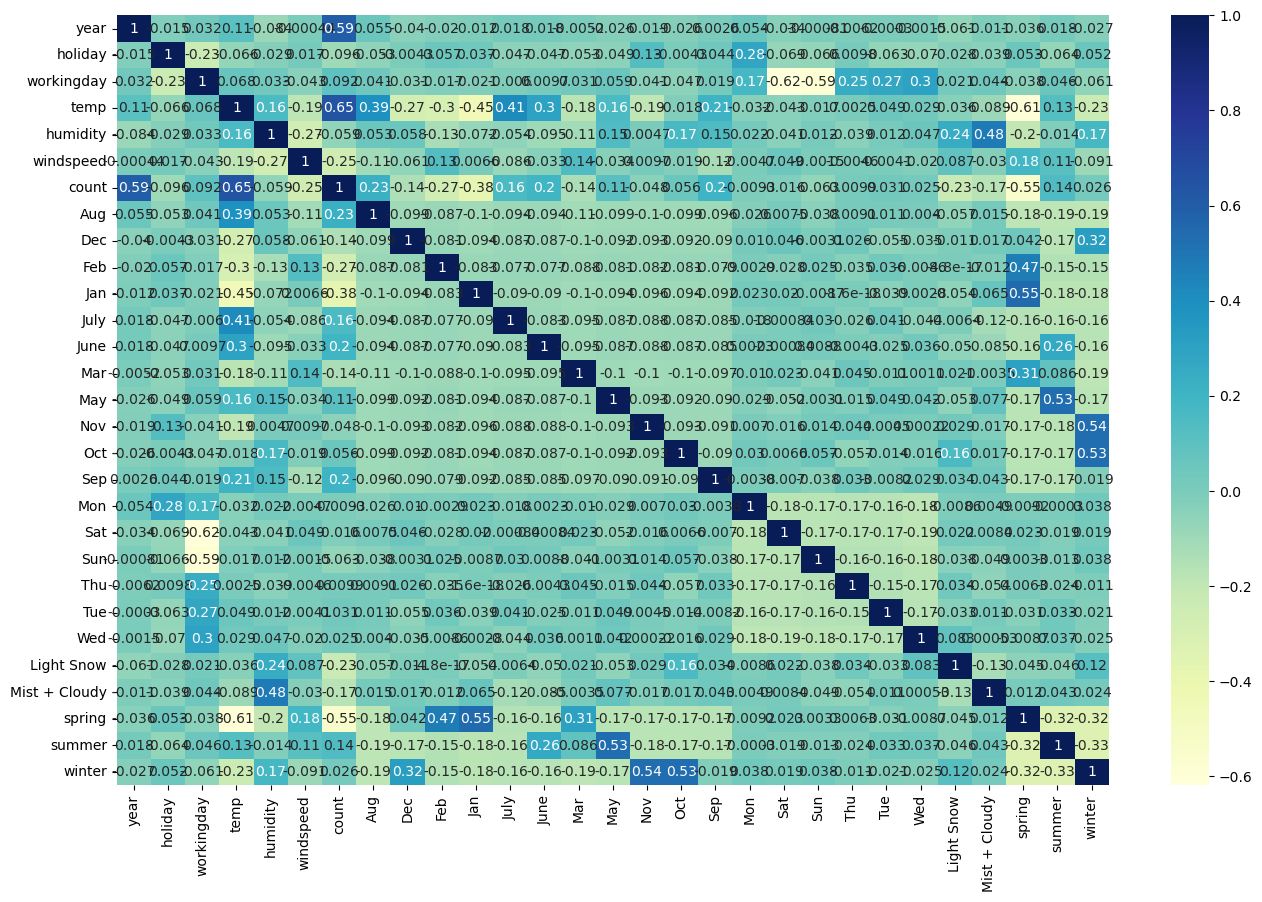

In [93]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Build linear regression model manually

In [94]:
# We had identified the temp variable had a good correlation with the count.
# So let us try to build a model with temp variable (simple linear regression) and then attempt to add more   
# Later, we can try MLR with automatic feature selection techniques

In [95]:
# Preparing the X_train & y_train sets

y_train = df_train.pop('count')
X_train = df_train

In [96]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [97]:
# Train the model using Statsmodel.  We are using statsmodel so that we can get detailed statistics about our model

In [99]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

# Model Object creation
lr_obj = sm.OLS(y_train, X_train_sm)

# Fit the model parameters
lr_model = lr_obj.fit()

# Display model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.46e-61
Time:                        18:55:51   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observations



1. The probability of each of the beta-coefficients is zero.  Which means they are significant.
2. R-squared is 0.416, which means 41.6% of the variance in the target variable is explained by this model.

In [100]:
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [101]:
# The equation for the target variable is y = 0.169 + temp * 0.641

In [102]:
# Now we add more variables.  Let us try weather situation & year

In [103]:
X_train_sm = X_train[['temp', 'Light Snow', 'Mist + Cloudy', 'year']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     359.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.56e-146
Time:                        18:56:00   Log-Likelihood:                 382.41
No. Observations:                 510   AIC:                            -754.8
Df Residuals:                     505   BIC:                            -733.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1213      0.015      8.257      0.000       0.092       0.150
temp              0.5664      0.023     24.854      0.000       0.522       0.611
Light Snow       -0.2547      0.030     -8.369      0.000      -0.315      -0.195
Mist + Cloudy    -0.0647      0.011     -5.967      0.000      -0.086      -0.043
year              0.2317      0.010     22.597      0.000       0.212       0.252
==============================================================================
Omnibus:                       12.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.124
Skew:                          -0.335   Prob(JB):                      0.00141
Kurtosis:                       3.409   Cond. No.                         7.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Observations
     
    

We can see that by adding year and the weather situation, our r-squared has gone to 0.74.  Which means that 74% of the variance is explained by this model, which contains temp, weather situation & year as the parameters.   

All of these parameters are also relevant (probability is zero)

##### Next Steps
      
      
We could continue building the model using this manual technique, progressively adding more variables, or even adding all the variables.  But that technique is time consuming and would lead to diminshed returns on the effort.   

Instead, we can now move on to building the model using automated feature selection techniques

### 3. Using RFE for Model Building

In [104]:
df_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [105]:
# We already have the X_train & y_train split

print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [106]:
# We can continue using it

In [107]:
# Create a LinearRegression Model and use RFE to train it.
lm_RFE = LinearRegression()
lm_RFE.fit(X_train, y_train)

# Let's run an RFE to find the 15 best features

rfe = RFE(lm_RFE, step=2, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [108]:
# List the selected variables

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 4),
 ('June', False, 8),
 ('Mar', False, 8),
 ('May', False, 4),
 ('Nov', False, 3),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 7),
 ('Tue', False, 6),
 ('Wed', False, 6),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 7),
 ('summer', True, 1),
 ('winter', True, 1)]

In [109]:
# Which columns are the ones where RFE support is True

In [110]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Aug',
       'Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'summer',
       'winter'],
      dtype='object')

##### Build A Model Using statsmodel

In [111]:
# Let's build a model using the statsmodel module.  This should give us detailed statistics

In [112]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [113]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [114]:
# Create the linear model & fit

# Model Object creation
lr_rfe_obj = sm.OLS(y_train, X_train_rfe)

# Fit the model parameters
lr_rfe_model = lr_rfe_obj.fit()

# Display model summary
lr_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.01e-191
Time:                        18:56:39   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1727      0.023      7.601      0.000       0.128       0.217
year              0.2299      0.008     28.744      0.000       0.214       0.246
holiday          -0.0233      0.021     -1.123      0.262      -0.064       0.017
workingday        0.0768      0.009      8.650      0.000       0.059       0.094
temp              0.5156      0.024     21.197      0.000       0.468       0.563
humidity         -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed        -0.1879      0.025     -7.411      0.000      -0.238      -0.138
Aug               0.0504      0.016      3.133      0.002       0.019       0.082
Jan              -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep               0.1170      0.016      7.317      0.000       0.086       0.148
Sat               0.0858      0.011      7.789      0.000       0.064       0.107
Sun               0.0334      0.012      2.878      0.004       0.011       0.056
Light Snow       -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist + Cloudy    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
summer            0.0967      0.011      8.705      0.000       0.075       0.119
winter            0.1375      0.011     11.978      0.000       0.115       0.160
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
# One thing to note here is that the holiday parameter is very insignificant.  Can we drop it?  Let's try

In [116]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [117]:
X_train_lm = sm.add_constant(X_train_new)

In [118]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [119]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.01e-191
Time:                        18:56:57   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1493      0.037      4.049      0.000       0.077       0.222
year              0.2299      0.008     28.744      0.000       0.214       0.246
workingday        0.1002      0.025      3.954      0.000       0.050       0.150
temp              0.5156      0.024     21.197      0.000       0.468       0.563
humidity         -0.1603      0.037     -4.329      0.000      -0.233      -0.088
windspeed        -0.1879      0.025     -7.411      0.000      -0.238      -0.138
Aug               0.0504      0.016      3.133      0.002       0.019       0.082
Jan              -0.0374      0.017     -2.164      0.031      -0.071      -0.003
Sep               0.1170      0.016      7.317      0.000       0.086       0.148
Sat               0.1091      0.027      4.077      0.000       0.057       0.162
Sun               0.0567      0.027      2.108      0.036       0.004       0.110
Light Snow       -0.2449      0.026     -9.423      0.000      -0.296      -0.194
Mist + Cloudy    -0.0565      0.010     -5.455      0.000      -0.077      -0.036
summer            0.0967      0.011      8.705      0.000       0.075       0.119
winter            0.1375      0.011     11.978      0.000       0.115       0.160
==============================================================================
Omnibus:                       63.744   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.444
Skew:                          -0.663   Prob(JB):                     3.54e-33
Kurtosis:                       5.296   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r-squared looks good.   


We can use this model.



In [120]:
X_train_new.columns

Index(['const', 'year', 'workingday', 'temp', 'humidity', 'windspeed', 'Aug',
       'Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'summer',
       'winter'],
      dtype='object')

##### Calculating VIF and finding any variables to remove

In [121]:
# Drop the constant
X_train_new = X_train_new.drop(['const'], axis=1)


vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,27.03
1,workingday,16.02
2,temp,12.26
4,windspeed,4.35
8,Sat,4.35
9,Sun,4.25
11,Mist + Cloudy,2.22
0,year,2.07
13,winter,2.06
12,summer,1.97


##### Observations

There aren't any high p-value, high VIF variables to drop.   

So move to the next set of values where High-Low pattern is observed.  There aren't any high p-value, low VIF value.  There are a few low p-value, high VIF value.  We drop them first.  



In [122]:
# humidity variable can be dropped due to high VIF
X_train_new_a = X_train_new.drop(['humidity'], axis = 1)

#adding constant to training variable
X_train_lr_a = sm.add_constant(X_train_new_a)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr_a)

#fit
lr_model_a = lr.fit()

#summary
lr_model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          6.55e-189
Time:                        18:57:07   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0600      0.031      1.929      0.054      -0.001       0.121
year              0.2336      0.008     28.879      0.000       0.218       0.250
workingday        0.1014      0.026      3.933      0.000       0.051       0.152
temp              0.4920      0.024     20.393      0.000       0.445       0.539
windspeed        -0.1583      0.025     -6.372      0.000      -0.207      -0.110
Aug               0.0487      0.016      2.980      0.003       0.017       0.081
Jan              -0.0431      0.018     -2.458      0.014      -0.078      -0.009
Sep               0.1109      0.016      6.843      0.000       0.079       0.143
Sat               0.1123      0.027      4.122      0.000       0.059       0.166
Sun               0.0549      0.027      2.004      0.046       0.001       0.109
Light Snow       -0.2889      0.024    -11.871      0.000      -0.337      -0.241
Mist + Cloudy    -0.0820      0.009     -9.475      0.000      -0.099      -0.065
summer            0.0931      0.011      8.256      0.000       0.071       0.115
winter            0.1270      0.011     11.121      0.000       0.105       0.149
==============================================================================
Omnibus:                       62.535   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.370
Skew:                          -0.654   Prob(JB):                     2.71e-32
Kurtosis:                       5.265   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
vif = pd.DataFrame()
X = X_train_new_a
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,10.87
2,temp,9.88
3,windspeed,4.35
7,Sat,3.25
8,Sun,3.04
0,year,2.06
11,summer,1.94
12,winter,1.80
4,Aug,1.60
10,Mist + Cloudy,1.60


##### Observations

There aren't any large high p-value, high VIF or low p-value, high VIF variables.  So we drop the ones with low p-value, high VIF.


In [124]:
# workingday variable can be dropped due to high VIF
X_train_new_b = X_train_new_a.drop(['workingday'], axis = 1)

#adding constant to training variable
X_train_lr_b = sm.add_constant(X_train_new_b)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr_b)

#fit
lr_model_b = lr.fit()

#summary
lr_model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          8.65e-187
Time:                        18:57:12   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1558      0.020      7.926      0.000       0.117       0.194
year              0.2341      0.008     28.520      0.000       0.218       0.250
temp              0.4954      0.024     20.255      0.000       0.447       0.544
windspeed        -0.1608      0.025     -6.381      0.000      -0.210      -0.111
Aug               0.0504      0.017      3.036      0.003       0.018       0.083
Jan              -0.0441      0.018     -2.479      0.014      -0.079      -0.009
Sep               0.1080      0.016      6.578      0.000       0.076       0.140
Sat               0.0148      0.011      1.289      0.198      -0.008       0.037
Sun              -0.0425      0.012     -3.592      0.000      -0.066      -0.019
Light Snow       -0.2841      0.025    -11.524      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
summer            0.0947      0.011      8.290      0.000       0.072       0.117
winter            0.1255      0.012     10.846      0.000       0.103       0.148
==============================================================================
Omnibus:                       75.413   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.337
Skew:                          -0.757   Prob(JB):                     2.09e-41
Kurtosis:                       5.555   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Sat variable by itself seems to have high p-value.  Let us drop it.
X_train_new_c = X_train_new_b.drop(['Sat'], axis = 1)

#adding constant to training variable
X_train_lr_c = sm.add_constant(X_train_new_c)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr_c)

#fit
lr_model_c = lr.fit()

#summary
lr_model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.27e-187
Time:                        18:57:15   Log-Likelihood:                 500.22
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1584      0.020      8.100      0.000       0.120       0.197
year              0.2337      0.008     28.475      0.000       0.218       0.250
temp              0.4947      0.024     20.216      0.000       0.447       0.543
windspeed        -0.1593      0.025     -6.324      0.000      -0.209      -0.110
Aug               0.0508      0.017      3.063      0.002       0.018       0.083
Jan              -0.0439      0.018     -2.468      0.014      -0.079      -0.009
Sep               0.1081      0.016      6.575      0.000       0.076       0.140
Sun              -0.0452      0.012     -3.875      0.000      -0.068      -0.022
Light Snow       -0.2839      0.025    -11.509      0.000      -0.332      -0.235
Mist + Cloudy    -0.0802      0.009     -9.143      0.000      -0.097      -0.063
summer            0.0946      0.011      8.277      0.000       0.072       0.117
winter            0.1258      0.012     10.867      0.000       0.103       0.149
==============================================================================
Omnibus:                       71.349   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.152
Skew:                          -0.705   Prob(JB):                     1.03e-40
Kurtosis:                       5.584   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# Let's look at VIF

In [130]:
X = X_train_lr_c.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,3.34
0,year,2.04
9,summer,1.89
3,Aug,1.60
10,winter,1.55
8,Mist + Cloudy,1.54
5,Sep,1.31
4,Jan,1.22
6,Sun,1.17


##### Observations

* July seems to have a slightly high p-value.  Let us drop it

In [164]:
# Jan variable by itself seems to have high p-value.  Let us drop it.
X_train_new_d = X_train_new_c.drop(['Jan'], axis = 1)

#adding constant to training variable
X_train_lr_d = sm.add_constant(X_train_new_d)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr_d)

#fit
lr_model_d = lr.fit()

#summary
lr_model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.59e-187
Time:                        19:51:35   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1330      0.017      7.958      0.000       0.100       0.166
year              0.2328      0.008     28.248      0.000       0.217       0.249
temp              0.5220      0.022     23.806      0.000       0.479       0.565
windspeed        -0.1517      0.025     -6.037      0.000      -0.201      -0.102
Aug               0.0531      0.017      3.188      0.002       0.020       0.086
Sep               0.1108      0.016      6.722      0.000       0.078       0.143
Sun              -0.0449      0.012     -3.829      0.000      -0.068      -0.022
Light Snow       -0.2822      0.025    -11.386      0.000      -0.331      -0.234
Mist + Cloudy    -0.0813      0.009     -9.222      0.000      -0.099      -0.064
summer            0.1021      0.011      9.211      0.000       0.080       0.124
winter            0.1373      0.011     12.873      0.000       0.116       0.158
==============================================================================
Omnibus:                       69.178   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.304
Skew:                          -0.688   Prob(JB):                     5.20e-39
Kurtosis:                       5.530   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# p-values are all low.   Let's look at VIF

X = X_train_lr_d.drop(['const'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,3.10
0,year,2.00
8,summer,1.81
3,Aug,1.58
7,Mist + Cloudy,1.49
9,winter,1.49
4,Sep,1.31
5,Sun,1.16
6,Light Snow,1.08


##### Observations

* All VIFs are less than 5 or close to 5
* There aren't any high p-values. All of them are below 0.05.


Since the adjusted r-squared value is also healthy (.831), we can stop the model building process here and 

### 4. Residual Analysis

In [135]:
# Our final model - lr_model_d
lr_model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.59e-187
Time:                        19:00:31   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1330      0.017      7.958      0.000       0.100       0.166
year              0.2328      0.008     28.248      0.000       0.217       0.249
temp              0.5220      0.022     23.806      0.000       0.479       0.565
windspeed        -0.1517      0.025     -6.037      0.000      -0.201      -0.102
Aug               0.0531      0.017      3.188      0.002       0.020       0.086
Sep               0.1108      0.016      6.722      0.000       0.078       0.143
Sun              -0.0449      0.012     -3.829      0.000      -0.068      -0.022
Light Snow       -0.2822      0.025    -11.386      0.000      -0.331      -0.234
Mist + Cloudy    -0.0813      0.009     -9.222      0.000      -0.099      -0.064
summer            0.1021      0.011      9.211      0.000       0.080       0.124
winter            0.1373      0.011     12.873      0.000       0.116       0.158
==============================================================================
Omnibus:                       69.178   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.304
Skew:                          -0.688   Prob(JB):                     5.20e-39
Kurtosis:                       5.530   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
lr_model_d.params

const            0.133020
year             0.232789
temp             0.522019
windspeed       -0.151702
Aug              0.053085
Sep              0.110811
Sun             -0.044887
Light Snow      -0.282214
Mist + Cloudy   -0.081256
summer           0.102096
winter           0.137290
dtype: float64

In [137]:
X_train_lr_d = sm.add_constant(X_train_lr_d)
X_train_lr_d

,const,year,temp,windspeed,Aug,Sep,Sun,Light Snow,Mist + Cloudy,summer,winter
576,1.0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0.442393,0.255342,0,0,0,0,1,0,0
728,1.0,1,0.245101,0.663106,0,0,1,0,0,0,0
482,1.0,1,0.395666,0.188475,0,0,0,0,1,1,0
111,1.0,0,0.345824,0.380981,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,1,0,0,0,0,0,0
53,1.0,0,0.202618,0.111379,0,0,0,0,0,0,0
350,1.0,0,0.248216,0.431816,0,0,0,0,1,0,1
79,1.0,0,0.462664,0.529881,0,0,0,0,1,1,0


In [138]:
# Make predictions for the training set using the model
y_train_pred = lr_model_d.predict(X_train_lr_d)

#### Checking for Normal Distribution of Residuals

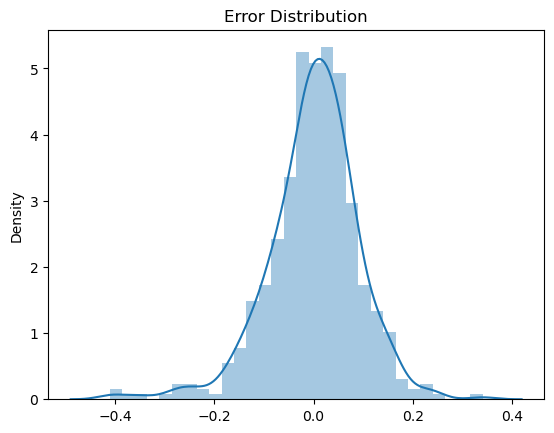

In [139]:
# Plot residuals

residuals = y_train - y_train_pred

#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(residuals)
plt.title('Error Distribution')
plt.show()

In [255]:
# Looks normal and is centered around zero

##### Using Q-Q Plot as well to check for normality

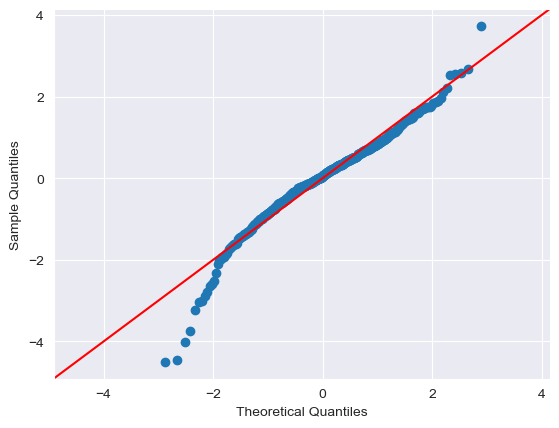

In [158]:
sm.qqplot(residuals, fit=True, line='45')
plt.show()

We look at the Q-Q plot to see if the residuals are normally distributed.  
Since most of the points lie on a straight line, it supports the discovery above that the distribution of residuals is normal

#### Checking for any patterns in residuals

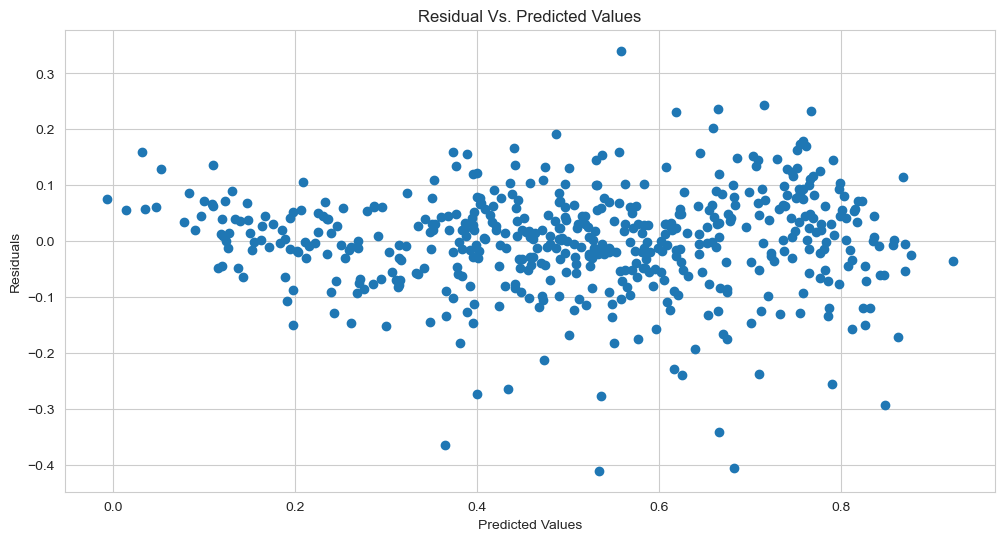

In [159]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
plt.scatter(y_train_pred, residuals)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Checking for Constant Variance in Predictions

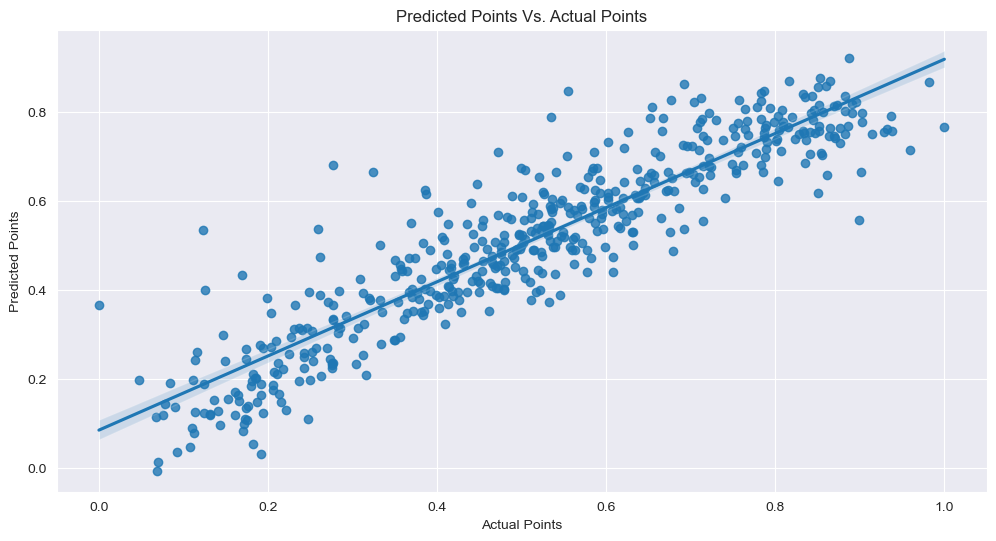

In [144]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

### 5. Making Predictions on Test Set

##### Now we need to make predictions on the test set.  
##### The test set needs to be scaled and then using the model we can predict the values

In [145]:
# Scale the variables in the test set.  CAUTION: DO NOT FIT
df_test[scaler_var] = norm_scaler.transform(df_test[scaler_var])

In [146]:
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
# Prepare the test values for doing the predictions

y_test = df_test.pop('count')
X_test = df_test

In [148]:
X_train_lr_d=X_train_lr_d.drop(['const'], axis = 1)

In [149]:
# Now let's use our model to make predictions.


# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lr_d.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [151]:
y_pred

184    0.473194
535    0.915108
299    0.405609
221    0.594816
152    0.580207
         ...   
702    0.731156
127    0.484882
640    0.803153
72     0.275240
653    0.723638
Length: 220, dtype: float64

Text(0, 0.5, 'y_pred')

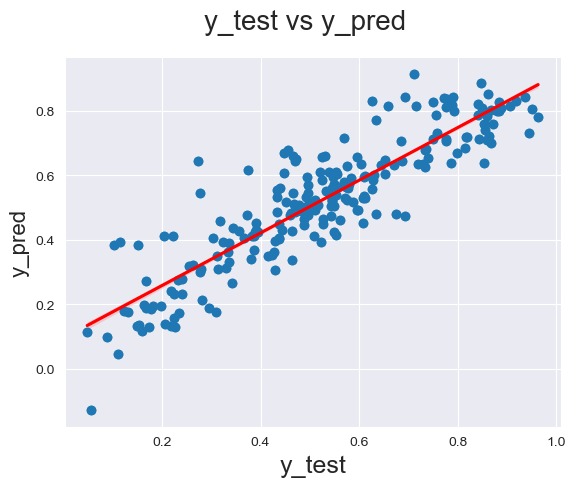

In [152]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [156]:
print('r-squared score of train dataset is', r2_score(y_train, y_train_pred))
print('r-squared score of test dataset is', r2_score(y_test, y_pred))

r-squared score of train dataset is 0.8341936887169201
r-squared score of test dataset is 0.7939613577489645


The R2 Score for the training data set is 0.83 vs 0.79 for the test set.  
  
The model is able to use the learnings from the training set and apply reasonably to the test set.
    
This means that the model we created can now be used to predict counts for business purpose.

### 6. Linear Regression Equation

In [161]:
lr_model_d.params

const            0.133020
year             0.232789
temp             0.522019
windspeed       -0.151702
Aug              0.053085
Sep              0.110811
Sun             -0.044887
Light Snow      -0.282214
Mist + Cloudy   -0.081256
summer           0.102096
winter           0.137290
dtype: float64

**Looking at the parameters here is the equation for linear regression**


count = 0.133 + 0.233 * year + 0.522 * temp - 0.152 * windspeed + 0.053 * Aug + 0.111 * Sep - 0.045 * Sun - 0.282 * Light Snow - 0.081 * "Mist + Cloudy" + 0.102 * summer + 0.137 * winter

### 7. Summary & Conclusions

We have done multiple linear regression using various techniques and arrived at an optimum model that can predict the count of bike rentals using various parameters.  The model has a good R-Squared value (0.834) on the train set and has a reasonable value for the test set (0.794).
    
Some of the observations from the model are

* Temperature is the most signficant parameter that determines demand.  It has a beta coefficent of 0.522 in the model.  It positively impacts the count of rentals
* People prefer to rent bikes during clear weather.  Light snow & cloudy/misty weathers are less preferred.  This reflects in the model as well where light snow has a -ve weight.
* Light Snow has a high correlation to the count.  It is -ve'ly impactiing the bike rental.
* Windspeed has -ve correlation with demand.  People do not prefer to drive a bike when it is windy.
* Winter season has a high +ve correlation.  People like to rent bikes in winter.
* Saturday & Wednesday have a higher spread of rentals